In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'C:\Users\Rameshwar Agarwal\Desktop\python\assignment 14\glass.csv')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [13]:
type_count = df['Type'].value_counts(sort=False)
type_count

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [17]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

Text(0, 0.5, 'Count')

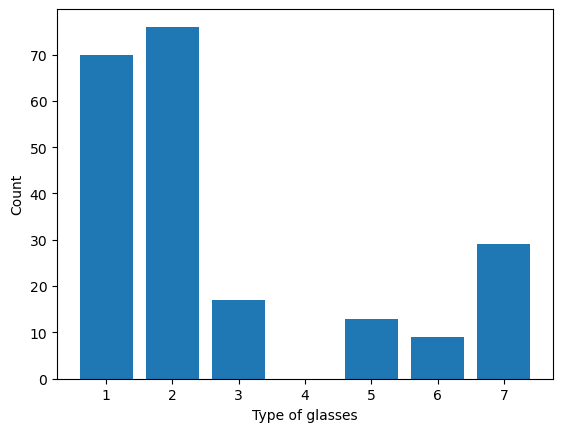

In [20]:
plt.bar(df['Type'].unique(), type_count)
plt.xlabel('Type of glasses')
plt.ylabel('Count')

In [21]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [22]:
X= df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y= df['Type']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

fit_tree = tree.fit(X_train, y_train)

predict = tree.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(predict,y_test))

from sklearn.model_selection import cross_val_score
print(cross_val_score(fit_tree, X, y, cv=3, scoring='accuracy'))

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [37]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [38]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [42]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5)

In [ ]:
rf_grid.fit(X_train,y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_